# 图像拼接
在本笔记本中，我们将演示如何拼接图像。当图像以[重叠的]瓦片方式获取时，通常需要进行拼接。垂直或水平组合这些瓦片称为拼接。

In [1]:
from skimage.io import imread
import stackview
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle
import numpy as np

获取图像后，你通常会知道图像重叠的程度。这里我们假设重叠是以像素数给出的。如果你只知道重叠的百分比，你需要将百分比乘以图像大小（宽度或高度）来计算这个数字。

In [2]:
num_overlap_pixels = 40

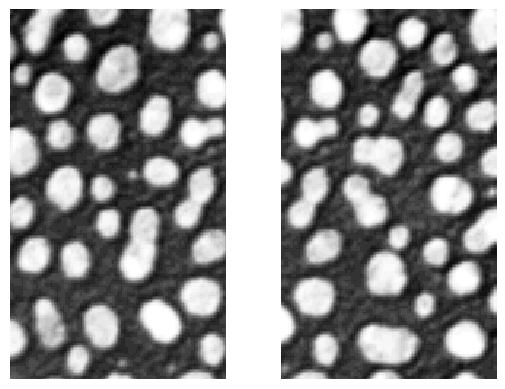

In [3]:
image1 = imread("../../data/blobs_stitching1_overlap40.tif")
image2 = imread("../../data/blobs_stitching2_overlap40.tif")
fig, ax = plt.subplots(1, 2)
stackview.imshow(image1, plot=ax[0])
stackview.imshow(image2, plot=ax[1])

请注意，这些图像包含一些重叠的像素。如果我们只是将图像并排组合，我们会看到这些像素出现两次。

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
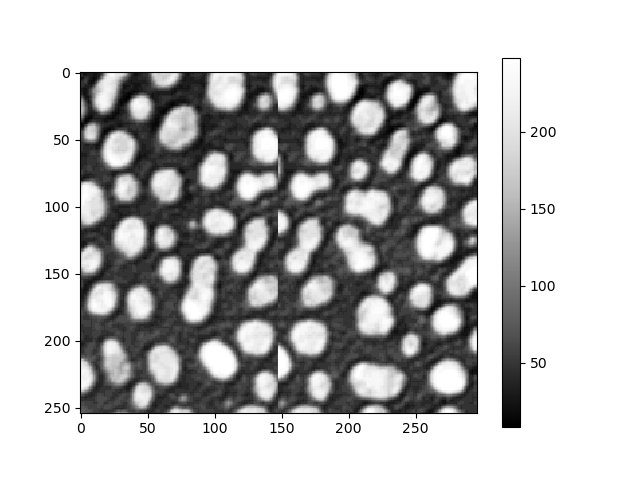
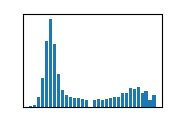

In [4]:
cle.combine_horizontally(image1, image2)

Pyclesperanto允许拼接带有重叠的图像。重叠区域将进行线性混合。

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
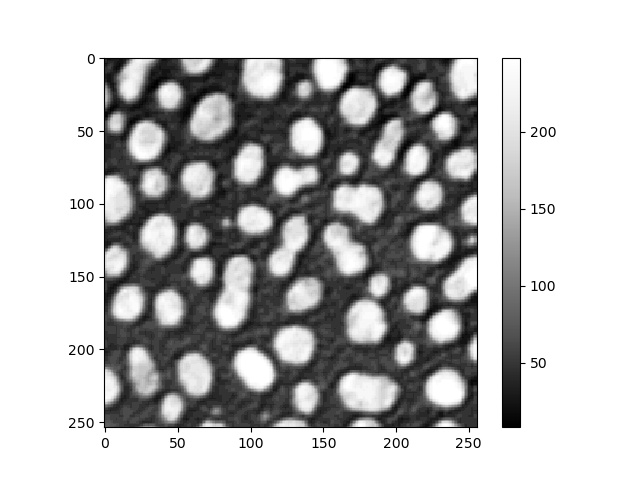
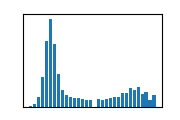

In [5]:
cle.stitch_horizontally_linear_blending(image1, image2, num_pixels_overlap=num_overlap_pixels)

为了演示线性混合是如何工作的，我们创建两个合成图像。首先我们按上面所示的方式组合它们。

cl.OCLArray([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]], dtype=float32)
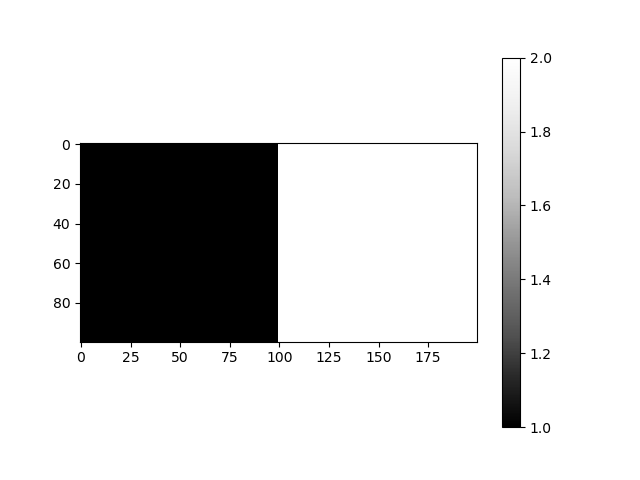
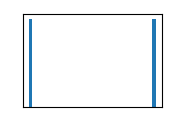

In [6]:
syn_image1 = np.ones((100, 100))
syn_image2 = np.ones((100, 100)) * 2

cle.combine_horizontally(syn_image1, syn_image2)

然后我们使用线性混合拼接图像。

cl.OCLArray([[1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]], dtype=float32)
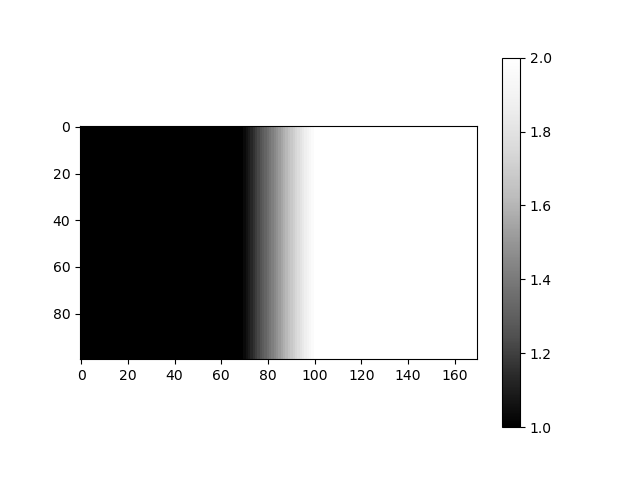
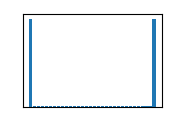

In [7]:
cle.stitch_horizontally_linear_blending(syn_image1, syn_image2, num_pixels_overlap=30)

注意：计算最佳重叠图像的配准参数目前在pyclesperanto中还不支持。